In [63]:
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# data opsplitsen in trainings-, validatie- en testset
from sklearn.model_selection import train_test_split
# grafieken
from matplotlib import pyplot as plt
# nodig voor het maken van het svm model
from sklearn import svm
# nodig om accuraatheid van de voorspellingen te bekijken
from sklearn import metrics

[[ 9.668 18.1  ]
 [15.1   16.39 ]
 [11.26  19.96 ]
 [19.19  15.94 ]
 [ 8.598 20.98 ]
 [18.65  17.6  ]
 [14.8   17.66 ]
 [14.87  20.21 ]
 [17.68  20.74 ]
 [15.37  22.76 ]
 [11.04  16.83 ]
 [10.95  21.35 ]
 [13.08  15.71 ]
 [16.26  21.88 ]
 [18.22  18.7  ]
 [ 6.981 13.43 ]
 [11.67  20.02 ]
 [12.45  16.41 ]
 [12.18  14.08 ]
 [13.98  19.62 ]]


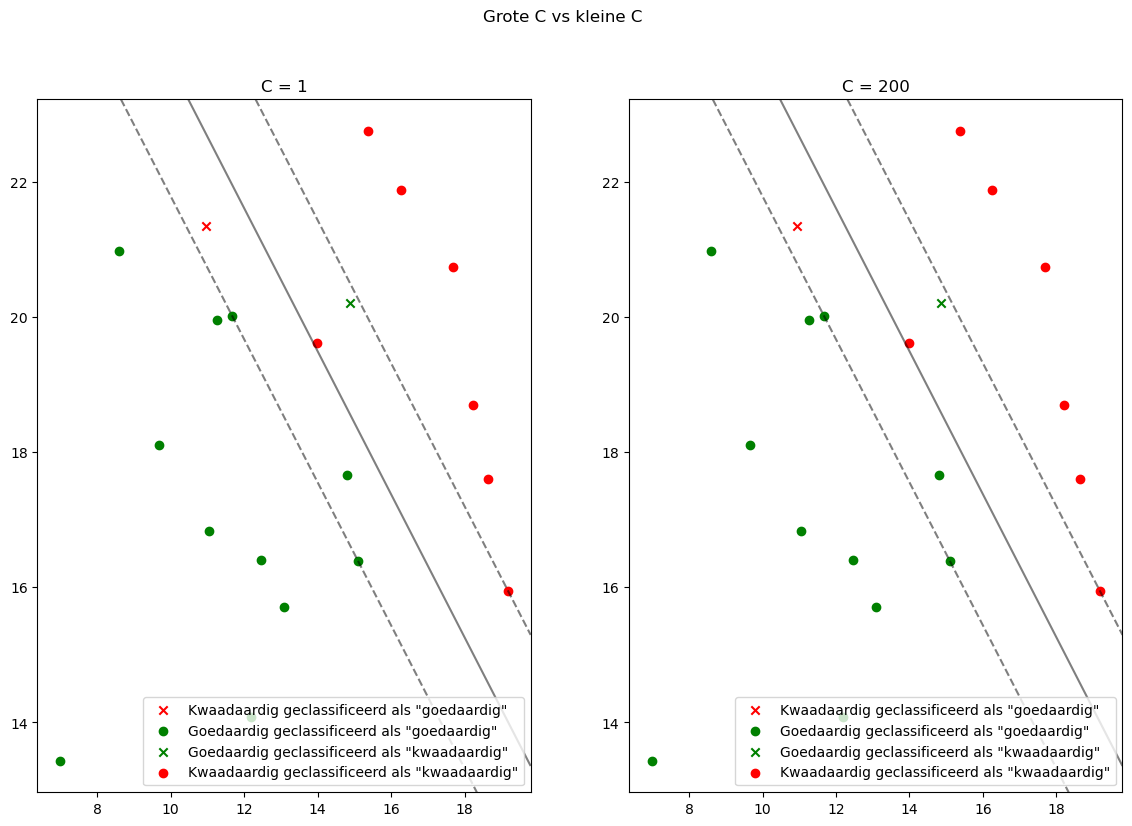

In [64]:
# We laden de data
gegevens = read_csv("data.csv")

# beperkt de dataset tot 30 random rijen
beperkteGegevens = gegevens.sample(n=20)

features = beperkteGegevens.iloc[:,2:4]
diagnoses = beperkteGegevens.iloc[:,1]

trainingX = features.values

print(trainingX)

trainingY = diagnoses.values

plt.figure(figsize=(14, 9))
plt.suptitle("Grote C vs kleine C")
ax1 = plt.subplot(1,2,1)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(trainingX, trainingY)
voorspellingen = clf.predict(trainingX)

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((voorspellingen == 'B') & (trainingY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((voorspellingen == 'B') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((voorspellingen == 'M') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((voorspellingen == 'M') & (trainingY == 'M'))

ax1.set_title("C = 1")
ax1.scatter(trainingX[falsePositives, 0], trainingX[falsePositives, 1], c='r', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')
ax1.scatter(trainingX[truePositives, 0], trainingX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
ax1.scatter(trainingX[falseNegatives, 0], trainingX[falseNegatives, 1], c='g', marker='x', label='Goedaardig geclassificeerd als "kwaadaardig"')
ax1.scatter(trainingX[trueNegatives, 0], trainingX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')

# Beslissingslijn plotten
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
ax2 = plt.subplot(1,2,2)
ax2.set_title("C = 200")

clf2 = svm.SVC(kernel='linear', C=4)
clf2.fit(trainingX, trainingY)
voorspellingen = clf2.predict(trainingX)

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((voorspellingen == 'B') & (trainingY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((voorspellingen == 'B') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((voorspellingen == 'M') & (trainingY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((voorspellingen == 'M') & (trainingY == 'M'))

ax2.scatter(trainingX[falsePositives, 0], trainingX[falsePositives, 1], c='r', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')
ax2.scatter(trainingX[truePositives, 0], trainingX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
ax2.scatter(trainingX[falseNegatives, 0], trainingX[falseNegatives, 1], c='g', marker='x', label='Goedaardig geclassificeerd als "kwaadaardig"')
ax2.scatter(trainingX[trueNegatives, 0], trainingX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')

# Beslissingslijn plotten
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend()
plt.savefig('grote_C_vs_kleine_C.pdf')
plt.show()